# Prediction Algorithms Complete

## Preliminaries

In [1]:
import copy
import os
import sys
import networkx as nx
import numpy as np

from os.path import dirname
from networkx.drawing.nx_pydot import to_pydot

# Import morpheus
note_dir = os.getcwd()
root_dir = dirname(note_dir)
src_dir = os.path.join(root_dir, "src")

sys.path.append(src_dir)

import morpheus

from morpheus.tests import (default_dataset,
                            default_m_list_for_mercs,
                            random_m_list_for_mercs)

from morpheus.graph import (model_to_graph,
                            fix_layout)

from morpheus.algo import (mi_algorithm,
                           ma_algorithm,
                           mrai_algorithm,
                           it_algorithm,
                           rw_algorithm)

In [2]:
from IPython.display import Image, display
from IPython.core.display import HTML 

### Methods

In [3]:
def to_dot(g, dname='tmp', fname='test', extension='.dot', return_fname=False, ortho=False, fi_labels=False):
    """
    Convert a graph to a dot file.
    """
    
    # Layout
    if fi_labels:
        for e in g.edges():
            g.edges()[e]['label'] = "{0:.2f}".format(g.edges()[e].get('fi', 0))
    
    dot = nx.drawing.nx_pydot.to_pydot(g)
    dot.set('rankdir', 'BT')
    
    if ortho:
        dot.set('splines', 'ortho')
    
    # To file
    full_fname = os.path.join(dname, fname+extension)
    
    with open(full_fname, "w") as f:
        print(dot.to_string(), file=f)
    
    if return_fname:
        return full_fname
    else:
        return

## Collect Basic Building Blocks

In [4]:
a = [1,2,3]
a[-1:]

[3]

In [5]:
data, _ = default_dataset()
data = data.values
m_list = default_m_list_for_mercs(data)

g_list = [model_to_graph(m, idx) for idx, m in enumerate(m_list)]
g_list = [fix_layout(g) for g in g_list]


        Learning model with desc ids:    [0, 1, 3, 4, 5, 6, 7]
                            targ ids:    [2]
        

        Learning model with desc ids:    [0, 1, 2, 3, 4, 5, 6]
                            targ ids:    [7]
        

        Learning model with desc ids:    [0, 1, 2, 3, 5, 6, 7]
                            targ ids:    [4]
        

        Learning model with desc ids:    [0, 2, 3, 4, 5, 6, 7]
                            targ ids:    [1]
        

        Learning model with desc ids:    [1, 2, 3, 4, 5, 6, 7]
                            targ ids:    [0]
        

        Learning model with desc ids:    [0, 1, 2, 3, 4, 6, 7]
                            targ ids:    [5]
        

        Learning model with desc ids:    [0, 1, 2, 3, 4, 5, 7]
                            targ ids:    [6]
        

        Learning model with desc ids:    [0, 1, 2, 4, 5, 6, 7]
                            targ ids:    [3]
        


## MI

Testing our most basic prediction algorithm.

In [6]:
# compute
q_code = np.array([0,0,0,0,0,-1,1,1])
g_res = mi_algorithm(g_list, q_code)

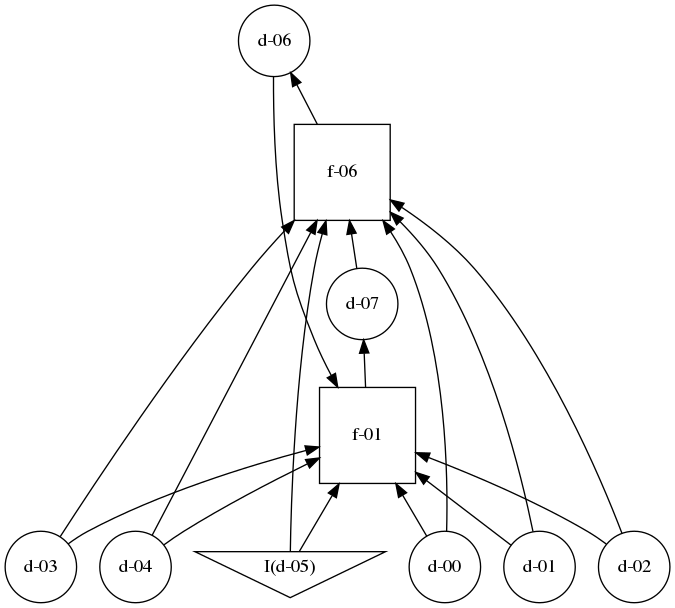

In [7]:
# show your work
fname = to_dot(g_res, fname='mi')
!dot -T png ./tmp/mi.dot > ./tmp/mi.png  # Bash command (This can be done nicer, but is tricky)

display(Image('tmp/mi.png'))

## MA

Slightly more advanced algorithm

In [8]:
# Preliminaries
m_list_random = random_m_list_for_mercs(data, random_state=16)
m_list_random += random_m_list_for_mercs(data, random_state=18)

g_list_random = [model_to_graph(m, idx) for idx, m in enumerate(m_list_random)]
g_list_random = [fix_layout(g) for g in g_list_random]

In [9]:
# Compute
q_code = np.array([-1,0,0,0,0,-1,1,0])
g_res = ma_algorithm(g_list_random, q_code, init_threshold = 0.9)


        yes_no:       False
        quantifier:   0.5
        result:       0.0
        


        yes_no:       False
        quantifier:   1.0
        result:       0.0
        


        yes_no:       False
        quantifier:   0.5
        result:       0.0
        


        yes_no:       False
        quantifier:   0.8
        result:       0.0
        


        yes_no:       False
        quantifier:   0.5
        result:       0.0
        


        yes_no:       True
        quantifier:   0.75
        result:       0.75
        


        yes_no:       False
        quantifier:   1.0
        result:       0.0
        


        yes_no:       False
        quantifier:   0.6666666666666666
        result:       0.0
        


        yes_no:       False
        quantifier:   0.6666666666666666
        result:       0.0
        


        yes_no:       False
        quantifier:   0.6666666666666666
        result:       0.0
        


        yes_no:       False
        quantif

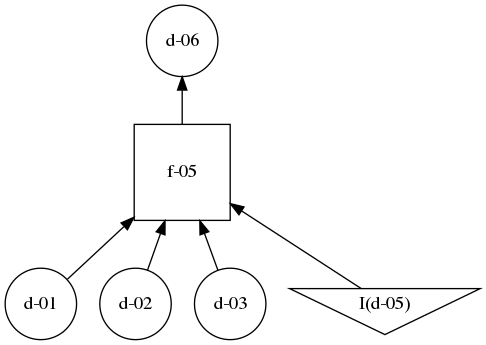

In [10]:
# show your work
fname = to_dot(g_res, fname='ma')
!dot -T png ./tmp/ma.dot > ./tmp/ma.png  # Bash command (This can be done nicer, but is tricky)

display(Image('tmp/ma.png', unconfined=True))

## MRAI

The most important single-layer algorithm

### Vanilla

In [11]:
# Create model
data, _ = default_dataset()
data = data.values

m_list_mrai = random_m_list_for_mercs(data, random_state=3)
m_list_mrai += random_m_list_for_mercs(data, random_state=4)

g_list_mrai = [model_to_graph(m, idx) for idx, m in enumerate(m_list_mrai)]
g_list_mrai = [fix_layout(g) for g in g_list_mrai]


        model:                      ['f-05']
        q_targ:                     [7]
        g_targ:                     {7}
        f_01 (relevant target):     1
        f_02 (fi avl attributes):   0.8405951643164262
        f_03 (fi bad attributes):   0.0
        relevance_criterion:        0.8405951643164262
        


        model:                      ['f-11']
        q_targ:                     [7]
        g_targ:                     {7}
        f_01 (relevant target):     1
        f_02 (fi avl attributes):   0.5208615060595355
        f_03 (fi bad attributes):   0.0
        relevance_criterion:        0.5208615060595355
        


                We have selected    1 model(s) 
                at threshold:       0.80
                with model ids:     [{'f-05'}]
                



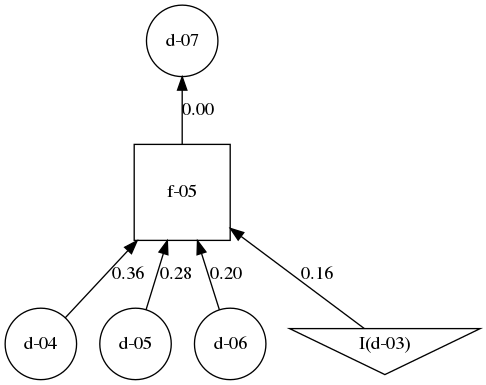

In [12]:
# Compute
q_code = np.array([-1,0,0,-1,0,0,0,1])
g_mrai = mrai_algorithm(g_list_mrai, q_code, init_threshold=0.9, stepsize=0.1)

# show your work
fname = to_dot(g_mrai, fname='mrai', fi_labels=True)
!dot -T png ./tmp/mrai.dot > ./tmp/mrai.png  # Bash command (This can be done nicer, but is tricky)

display(Image('tmp/mrai.png'))

### Bit more to the test

Really elaborate hack to manually change feature importances at model level. Nevermind this, just to prove a point.

In [13]:
class hack_fi(object):
    def __init__(self, model):
        
        a = m.feature_importances_
        a[1] += a[0] - 0.01
        a[0] = 0.01
        
        print(a)
        
        self.feature_importances_ = a
        
        for x in dir(m):
            if x.startswith('_'):
                pass
            elif x.startswith('feature_'):
                pass
            else:
                self.__setattr__(x, m.__getattribute__(x))
        
        return 


In [14]:
m = copy.deepcopy(g_list_mrai[5].nodes()['f-05']['mod'])
m = hack_fi(m)

g = model_to_graph(m, idx=99)
g = fix_layout(g)
g_list_mrai_two = g_list_mrai + [g]

[0.01       0.5093167  0.28488012 0.19580318]



        model:                      ['f-05']
        q_targ:                     [7]
        g_targ:                     {7}
        f_01 (relevant target):     1
        f_02 (fi avl attributes):   0.8405951643164262
        f_03 (fi bad attributes):   0.0
        relevance_criterion:        0.8405951643164262
        


        model:                      ['f-11']
        q_targ:                     [7]
        g_targ:                     {7}
        f_01 (relevant target):     1
        f_02 (fi avl attributes):   0.5208615060595355
        f_03 (fi bad attributes):   0.0
        relevance_criterion:        0.5208615060595355
        


        model:                      ['f-99']
        q_targ:                     [7]
        g_targ:                     {7}
        f_01 (relevant target):     1
        f_02 (fi avl attributes):   0.99
        f_03 (fi bad attributes):   0.0
        relevance_criterion:        0.99
        


                We have selected    1 model(s) 
       

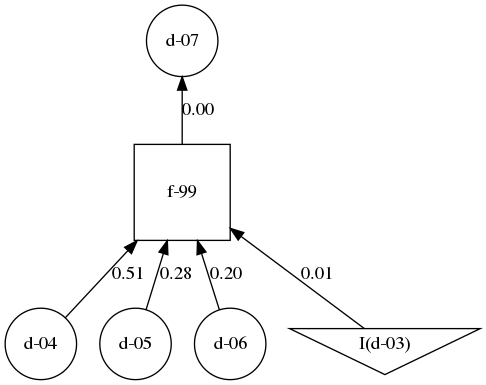

In [15]:
# Compute
q_code = np.array([-1,0,0,-1,0,0,0,1])
g_mrai_2 = mrai_algorithm(g_list_mrai_two, q_code, init_threshold=0.9, stepsize=0.1)

# show your work
fname = to_dot(g_mrai_2, fname='mrai_2', fi_labels=True)
!dot -T png ./tmp/mrai_2.dot > ./tmp/mrai_2.png  # Bash command (This can be done nicer, but is tricky)

display(Image('tmp/mrai_2.png'))

lgtm

### Multi-Target test


        Multi-target case:      
        with target attributes: [5, 7]
        


        model:                      ['f-06']
        q_targ:                     [5]
        g_targ:                     {5}
        f_01 (relevant target):     1
        f_02 (fi avl attributes):   0.5369386419223356
        f_03 (fi bad attributes):   0.0
        relevance_criterion:        0.5369386419223356
        


        model:                      ['f-12']
        q_targ:                     [5]
        g_targ:                     {5}
        f_01 (relevant target):     1
        f_02 (fi avl attributes):   0.6011352893093802
        f_03 (fi bad attributes):   0.12344398428102685
        relevance_criterion:        0.47769130502835333
        


                We have selected    1 model(s) 
                at threshold:       0.50
                with model ids:     [{'f-06'}]
                


        model:                      ['f-05']
        q_targ:                     [7]
        g_t

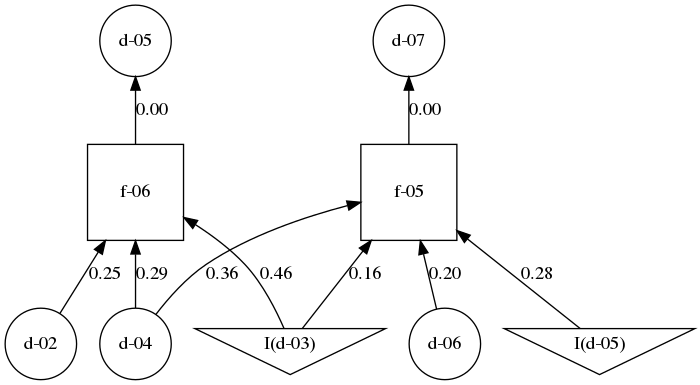

In [16]:
# Compute
q_code = np.array([-1,0,0,-1,0,1,0,1])
g_mrai = mrai_algorithm(g_list_mrai, q_code, init_threshold=0.9, stepsize=0.1)

# show your work
fname = to_dot(g_mrai, fname='mrai-mt', fi_labels=True)
!dot -T png ./tmp/mrai-mt.dot > ./tmp/mrai-mt.png  # Bash command (This can be done nicer, but is tricky)

display(Image('tmp/mrai-mt.png'))

# Multi-Layer Algorithms

## IT

In [17]:
# Create model
data, _ = default_dataset(n_features=10)
data = data.values

m_list_it = random_m_list_for_mercs(data, its=4, fraction=0.4,random_state=3)

g_list_it = [model_to_graph(m, idx) for idx, m in enumerate(m_list_it)]
g_list_it = [fix_layout(g) for g in g_list_it]

In [18]:
data.shape

(800, 11)


        model:                      ['f-04']
        q_targ:                     [0, 2, 4, 5, 6, 8, 10]
        g_targ:                     {6}
        f_01 (relevant target):     1
        f_02 (fi avl attributes):   0.5920705242316124
        f_03 (fi bad attributes):   0.40792947576838756
        relevance_criterion:        0.18414104846322488
        


        model:                      ['f-07']
        q_targ:                     [0, 2, 4, 5, 6, 8, 10]
        g_targ:                     {8}
        f_01 (relevant target):     1
        f_02 (fi avl attributes):   0.5461872066182545
        f_03 (fi bad attributes):   0.45381279338174557
        relevance_criterion:        0.09237441323650891
        


        model:                      ['f-09']
        q_targ:                     [0, 2, 4, 5, 6, 8, 10]
        g_targ:                     {2}
        f_01 (relevant target):     1
        f_02 (fi avl attributes):   0.6035995586906033
        f_03 (fi bad attributes):   0.3964

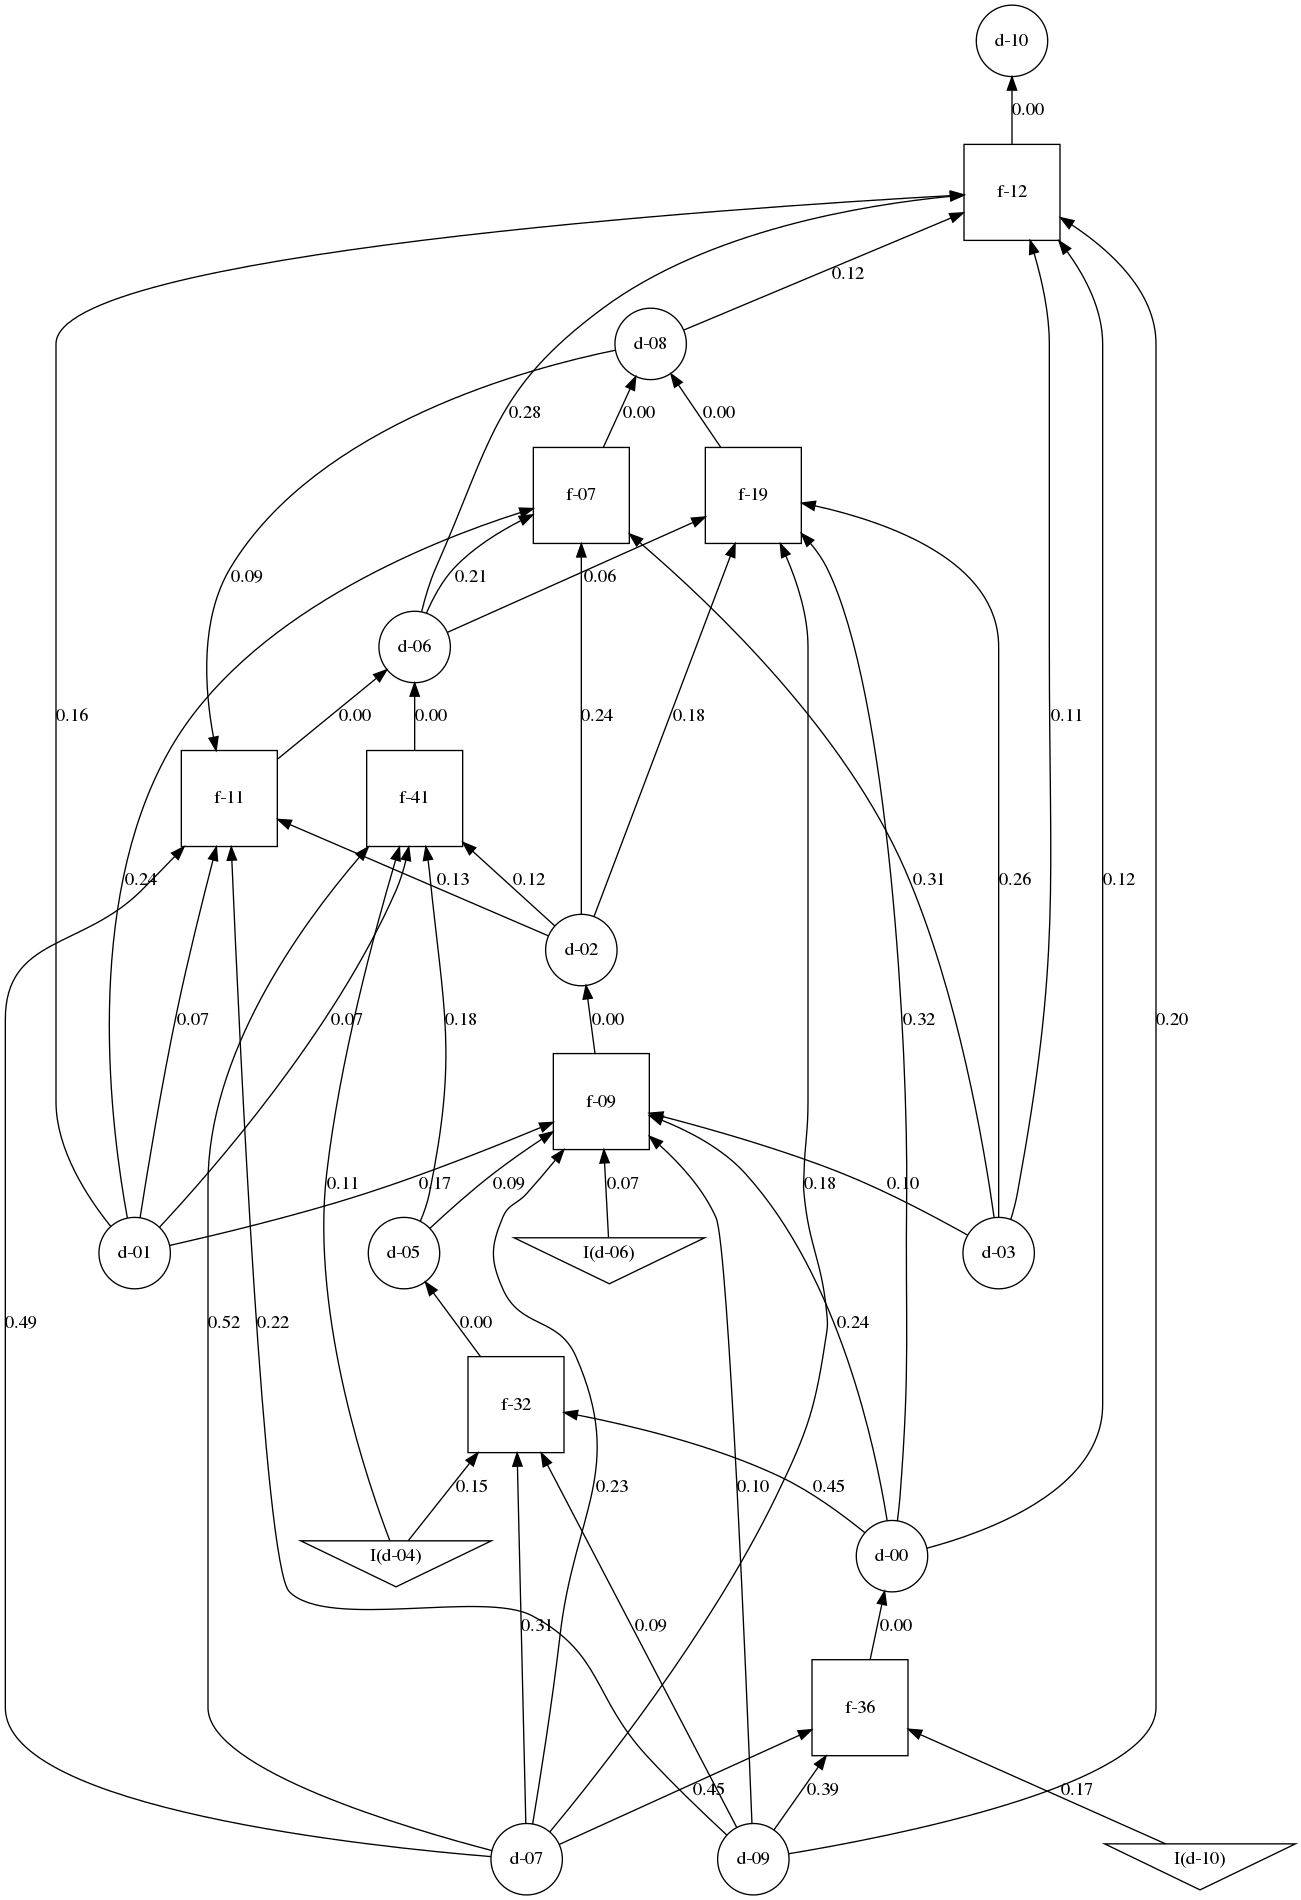

In [19]:
# Compute
q_code = np.array([-1,0,-1,0,-1, -1,-1,0,1,0, 1])
g_it = it_algorithm(g_list_it, q_code, max_steps=8)

# show your work
fname = to_dot(g_it, fname='it', fi_labels=True)
!dot -T png ./tmp/it.dot > ./tmp/it.png  # Bash command (This can be done nicer, but is tricky)

display(Image('tmp/it.png'))

## RW

The final algorithm, that hopefully works a bit.

In [20]:
# Create model
data, _ = default_dataset(n_features=10)
data = data.values

m_list_rw = random_m_list_for_mercs(data, its=4, fraction=0.4, random_state=3)

g_list_rw = [model_to_graph(m, idx) for idx, m in enumerate(m_list_rw)]
g_list_rw = [fix_layout(g) for g in g_list_rw]


        model:                      ['f-01']
        q_targ:                     [10]
        g_targ:                     {10}
        f_01 (relevant target):     1
        f_02 (fi avl attributes):   0.7325288770827613
        f_03 (fi bad attributes):   0.0
        relevance_criterion:        0.7325288770827613
        


        model:                      ['f-12']
        q_targ:                     [10]
        g_targ:                     {10}
        f_01 (relevant target):     1
        f_02 (fi avl attributes):   0.7313035973325754
        f_03 (fi bad attributes):   0.0
        relevance_criterion:        0.7313035973325754
        


        model:                      ['f-24']
        q_targ:                     [10]
        g_targ:                     {10}
        f_01 (relevant target):     1
        f_02 (fi avl attributes):   0.6931377361020137
        f_03 (fi bad attributes):   0.0
        relevance_criterion:        0.6931377361020137
        


        model:       

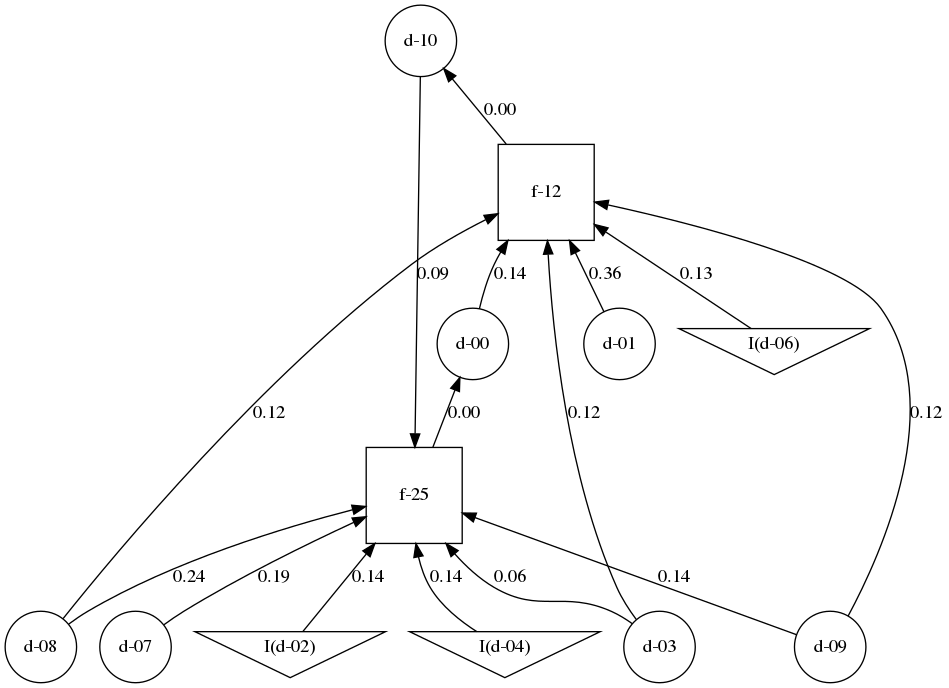

In [21]:
# Compute
q_code = np.array([-1,0,-1,0,-1, -1,-1,0,0,0, 1])
g_rw = rw_algorithm(g_list_rw, q_code, max_steps=2)

# show your work
fname = to_dot(g_rw, fname='rw', fi_labels=True)
!dot -T png ./tmp/rw.dot > ./tmp/rw.png  # Bash command (This can be done nicer, but is tricky)

display(Image('tmp/rw.png'))